In [174]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
sns.set()

In [175]:
data=pd.read_csv('mpg_raw.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [176]:
cat=list(data.select_dtypes(include=['object']).columns)
num=list(data.select_dtypes(exclude=['object']).columns)
print('categorical variable:',cat)
print('numerical variable:',num)

categorical variable: ['origin', 'name']
numerical variable: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


In [177]:
cat.extend(['cylinders','model_year'])
num.remove('cylinders')
num.remove('model_year')
print('categorical variable:',cat)
print('numerical variable:',num)

categorical variable: ['origin', 'name', 'cylinders', 'model_year']
numerical variable: ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [178]:
#since nan row proportion is very less so we remove it
data=data.dropna(how='any',axis=0)

In [179]:
data.shape

(392, 9)

In [180]:
# remove extra spaces if any
data['name'] = data['name'].apply(lambda x: ' '.join(x.split()))
    

In [181]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [182]:
data['mpg_level']=data['mpg'].apply(lambda x:'low' if x<17 else 'high' if x>29 else 'medium')
cat.append('mpg_level')
print('categorical variable',cat)

categorical variable ['origin', 'name', 'cylinders', 'model_year', 'mpg_level']


In [183]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_level
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,medium
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,low
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,medium
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,low
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,medium


In [184]:
data=pd.concat((data[cat],data[num]),axis=1)
data.head()

,origin,name,cylinders,model_year,mpg_level,mpg,displacement,horsepower,weight,acceleration
0,usa,chevrolet chevelle malibu,8,70,medium,18.0,307.0,130.0,3504,12.0
1,usa,buick skylark 320,8,70,low,15.0,350.0,165.0,3693,11.5
2,usa,plymouth satellite,8,70,medium,18.0,318.0,150.0,3436,11.0
3,usa,amc rebel sst,8,70,low,16.0,304.0,150.0,3433,12.0
4,usa,ford torino,8,70,medium,17.0,302.0,140.0,3449,10.5


Starting Statistical Analysis

In [185]:
alpha=0.05

In [186]:
#test for independence between two categorical variables
pd.crosstab(data['origin'],data['model_year'])#contingency table

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,5,4,5,7,6,6,8,4,6,4,8,3,2
japan,2,4,5,4,6,4,4,6,8,2,13,12,9
usa,22,19,18,29,14,20,22,18,22,23,6,13,19


since by seeing contingency table our chi2 assumpation faile,we can apply test but result would be not reliable

In [187]:
obs_val=pd.crosstab(data['origin'],data['mpg_level'])
obs_val

mpg_level,high,low,medium
origin,,,
europe,22,2,44
japan,49,0,30
usa,24,90,131


In [188]:
chi2,p,dof,exp_val=stats.chi2_contingency(obs_val)
chi2,p,dof,exp_val

(123.76491109767298,
 8.381476294026467e-26,
 4,
 array([[ 16.47959184,  15.95918367,  35.56122449],
        [ 19.14540816,  18.54081633,  41.31377551],
        [ 59.375     ,  57.5       , 128.125     ]]))

In [189]:
#since by seeing p val which is less than alpha(0.5) so we have significant proof to reject nnull hypothesis
if p<alpha:
    print(f'rejected H0 under significance level {alpha} origin and model year are dependent')
else:
    print(f'fail to reject H0 due to the lack of evidenceunder significance level {alpha} origin and model are independent')

rejected H0 under significance level 0.05 origin and model year are dependent


In [190]:
data_cat=pd.concat([data.loc[:, ['origin','mpg_level']].apply(lambda x:LabelEncoder().fit_transform(x)),data.loc[:, ['cylinders','model_year']]],axis=1)
data_cat.head()

,origin,mpg_level,cylinders,model_year
0,2,2,8,70
1,2,1,8,70
2,2,2,8,70
3,2,1,8,70
4,2,2,8,70


In [191]:
chi2_res=feature_selection.chi2(data_cat,data.mpg_level)
data_chi2=pd.DataFrame({
    'attr1':'mpg_level',
    'attr2':data_cat.columns,
    'chi2':chi2_res[0],
    'p':chi2_res[1],
    'alpha':alpha
})
data_chi2['H0']=data_chi2['p'].apply(lambda x:'rejected' if x<=alpha else 'fail to reject')
data_chi2['relation']=data_chi2['H0'].apply(lambda x:'dependent' if x=='rejected' else 'independent')
data_chi2

,attr1,attr2,chi2,p,alpha,H0,relation
0,mpg_level,origin,28.395578,6.823049e-07,0.05,rejected,dependent
1,mpg_level,mpg_level,210.159363,2.314591e-46,0.05,rejected,dependent
2,mpg_level,cylinders,127.418999,2.144450e-28,0.05,rejected,dependent
3,mpg_level,model_year,21.742075,1.900065e-05,0.05,rejected,dependent


Now going to perform statistical analysis for Numerical Attributes

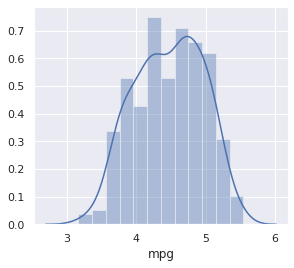

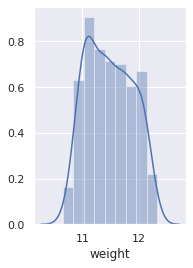

In [192]:
#By seeing the histogram plots we came to know that acceleration have almost gaussian distribution and weight,mpg have log normal distribution
#let see they are log normal or not
fig=plt.figure(1,(10,4))
ax=plt.subplot(1,2,1)
sns.distplot(np.log2(data.mpg))
plt.show()

ax=plt.subplot(1,2,1)
sns.distplot(np.log2(data['weight']))
plt.show()

weight look like log normal but mpg wont be log normal distibution

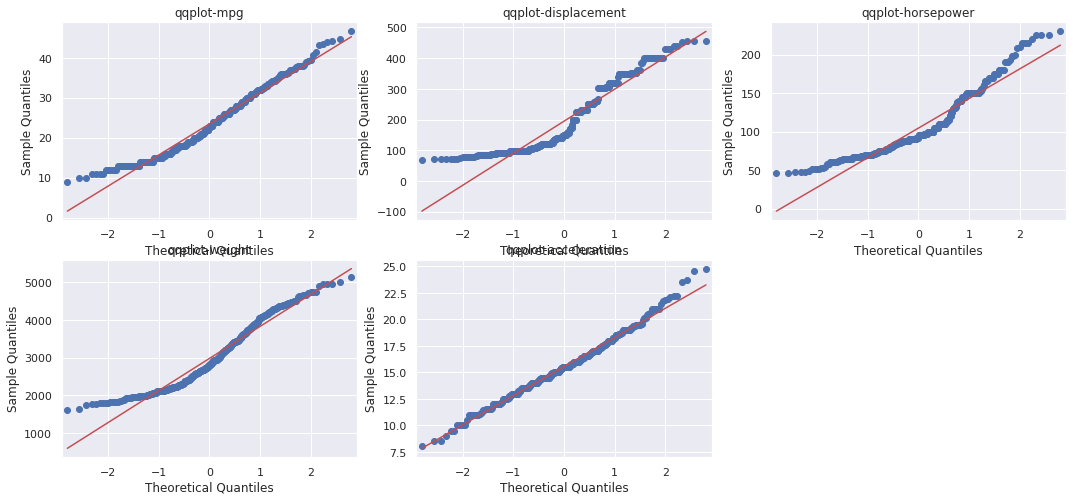

In [193]:
#Quantile Quantile plot
fig=plt.figure(1,(18,8))
for i,n in enumerate(num):
    ax=plt.subplot(2,3,i+1)
    qqplot(data[n],line='s',ax=ax)
    ax.set_title(f'qqplot-{n}')
#     plt.tight_layout()

QQplot also shows that acceleration is close to gaussian distribution

### Applying Shapiro Wilk test to test the normality of data

In [194]:
def shapiro_test(data:pd.DataFrame,cols:list,alpha=0.05):
    for col in cols:
        _,p=stats.shapiro(data[col])
        if p<alpha:
            print(f'''\n Rejected H0 under the significant level {alpha}\n{col} does'nt seems to be normally distributed''')
        else:
            print(f'''\nFail to reject H0 due to lack of evidence under significance level {alpha}\n{col} seem to be normally distributed''')

In [195]:
shapiro_test(data,num)


 Rejected H0 under the significant level 0.05
mpg does'nt seems to be normally distributed

 Rejected H0 under the significant level 0.05
displacement does'nt seems to be normally distributed

 Rejected H0 under the significant level 0.05
horsepower does'nt seems to be normally distributed

 Rejected H0 under the significant level 0.05
weight does'nt seems to be normally distributed

 Rejected H0 under the significant level 0.05
acceleration does'nt seems to be normally distributed


In [196]:
print(stats.shapiro(data['acceleration']))

ShapiroResult(statistic=0.9918678402900696, pvalue=0.03054318018257618)


so p value of 'acceleration' is less than alpha(level of significance) so we have to reject null hypothesis(normally distributed) while by seeing the graph it seem like it follows normal distribution,maybe data isnot scaled 

In [197]:
#performing Power Transforrm to make data mor gaussian like
from sklearn.preprocessing import PowerTransformer
data_numPT=pd.DataFrame(PowerTransformer().fit_transform(data[num]),columns=num)
data_numPT.head()

/home/amankumar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,mpg,displacement,horsepower,weight,acceleration
0,-0.635451,1.119336,0.854984,0.0,-1.317572
1,-1.142697,1.324530,1.443754,0.0,-1.522941
2,-0.635451,1.175211,1.216062,0.0,-1.732292
3,-0.965340,1.103648,1.216062,0.0,-1.317572
4,-0.796543,1.093078,1.044925,0.0,-1.945873


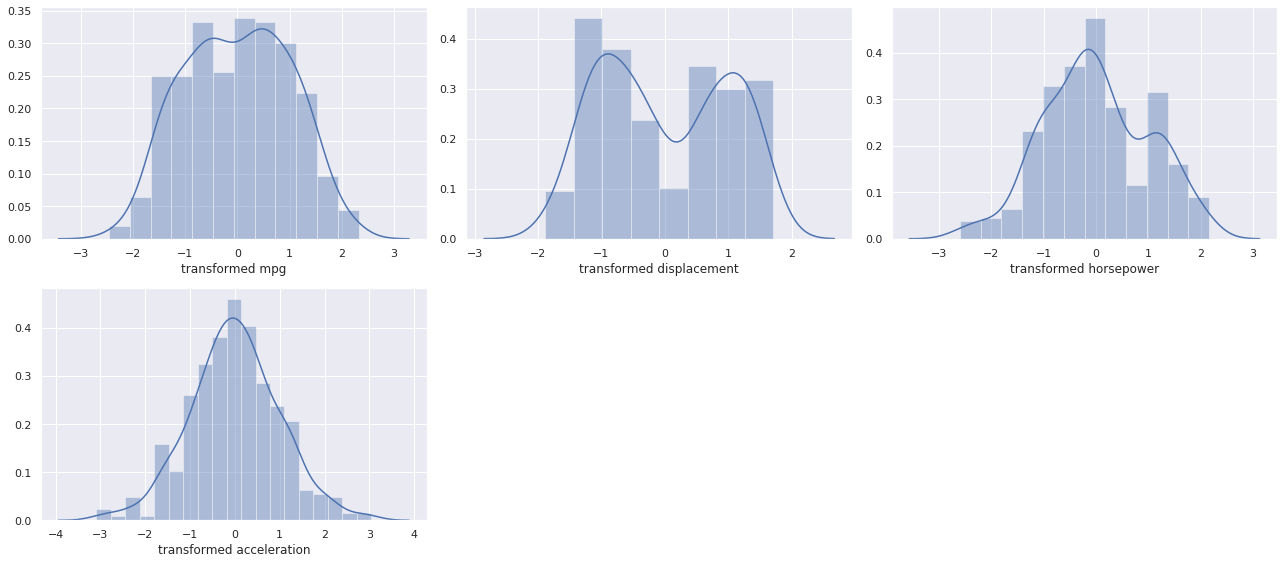

In [198]:
#now plotting the above data
fig = plt.figure(1, (18,8))

for i,num in enumerate(['mpg', 'displacement', 'horsepower', 'acceleration']):
    ax = plt.subplot(2,3,i+1)
    sns.distplot(data_numPT[num])
    ax.set_xlabel(f'transformed {num}')
    plt.tight_layout()

By seeing the above graphs power transfrom scaled the data and made the distr. more gaussian like

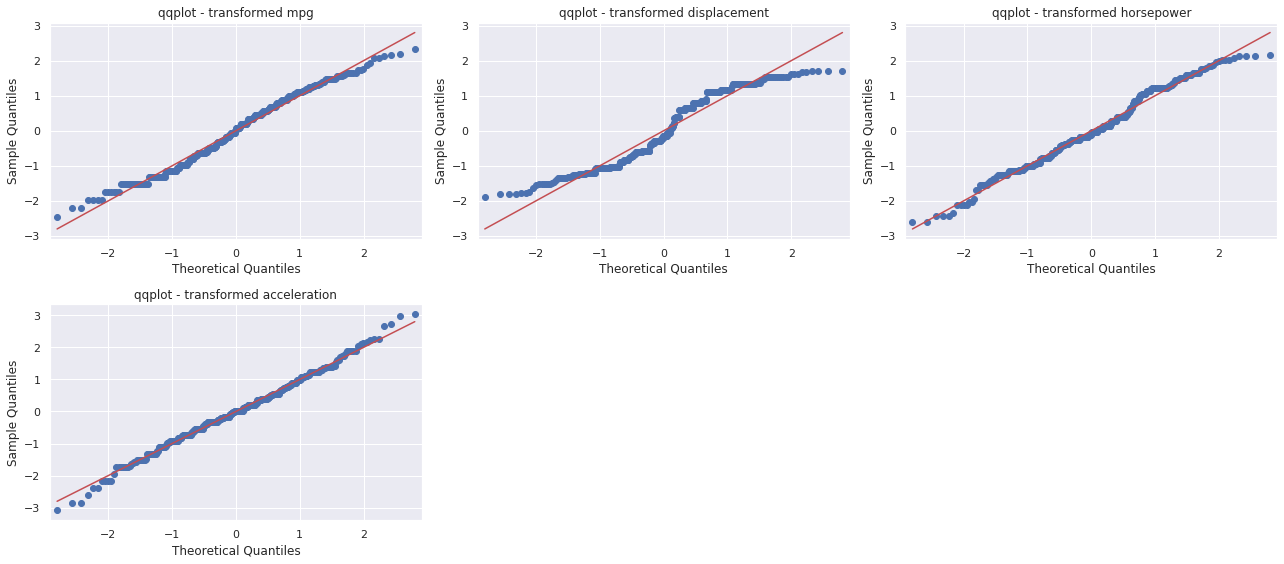

In [199]:
#let have a look normality using qqplot
fig = plt.figure(1,(18,8))

for i,num in enumerate(['mpg', 'displacement', 'horsepower', 'acceleration']):
    ax = plt.subplot(2,3,i+1)
    qqplot(data_numPT[num], line='s', ax=ax)
    ax.set_title(f'qqplot - transformed {num}')
    plt.tight_layout()

In [200]:
# Now again applying shapiroo wilk test on scaled data
shapiro_test(data_numPT,['mpg', 'displacement', 'horsepower', 'acceleration'])


 Rejected H0 under the significant level 0.05
mpg does'nt seems to be normally distributed

 Rejected H0 under the significant level 0.05
displacement does'nt seems to be normally distributed

 Rejected H0 under the significant level 0.05
horsepower does'nt seems to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
acceleration seem to be normally distributed


In [201]:
_, p = stats.shapiro(data_numPT['acceleration'])
p

0.3864997923374176

So `acceleration` is normally distributed both visually and statistically.

### Now checking for correlation

In [202]:
#using Spearman,and assuming mpg and other attributes are not correlated
for num in (['mpg', 'displacement', 'horsepower', 'acceleration']):
    if num == 'mpg':
        continue
    
    corr, p = stats.spearmanr(data.mpg, data[num])

    print(f'\n* `mpg` & `{num}`\n')
    print(f'corr: {round(corr, 4)} \t p: {p}')

    if p <= alpha:
        print(f'Rejected H0 under significance level {alpha}, mpg & {num} are correlated')
    else:
        print(f'''Fail to reject H0 due to lack of evidence under significance level {alpha}, 
              mpg & {num} are not correlated''')


* `mpg` & `displacement`

corr: -0.8552 	 p: 2.1957775993226176e-113
Rejected H0 under significance level 0.05, mpg & displacement are correlated

* `mpg` & `horsepower`

corr: -0.8536 	 p: 1.619383245501938e-112
Rejected H0 under significance level 0.05, mpg & horsepower are correlated

* `mpg` & `acceleration`

corr: 0.4415 	 p: 3.9036035663531793e-20
Rejected H0 under significance level 0.05, mpg & acceleration are correlated


Except acceleartion every other feature got rejected under significance level of 0.05.Like obove we can check correlation between every possible combination

### Parametric Statistical Significance Test 

In [203]:
#now for checking the equality of mean between two feature we perform parametric test for normal distributed data and non parametric test for other distribution
#Lets first check whether acceleartion of both japan and usa are normally distributed
shapiro_test(data[data.origin=='japan'], ['acceleration'])


Fail to reject H0 due to lack of evidence under significance level 0.05
acceleration seem to be normally distributed


In [204]:
shapiro_test(data[data.origin=='usa'], ['acceleration'])


Fail to reject H0 due to lack of evidence under significance level 0.05
acceleration seem to be normally distributed


In [205]:
#since both the above distribution are normally distributed so we can apply parametric test
#H0 : acceleration of japan and acceleration of usa has same sample mean. 
_, p = stats.ttest_ind(data[data.origin=='japan'].acceleration, data[data.origin=='usa'].acceleration, equal_var=False)

if p <= alpha:
    print(f'Rejected H0 under {alpha*100}% significance, Different distributions.')
else:
    print(f'Fail to Reject H0 under {alpha*100}% significance, Same distributions.')

Rejected H0 under 5.0% significance, Different distributions.


In [206]:
#Let's test whether horsepower across all the regions has the same distribution or not.
shapiro_test(data[data.origin=='japan'], ['horsepower'])


 Rejected H0 under the significant level 0.05
horsepower does'nt seems to be normally distributed


In [207]:
shapiro_test(data[data.origin=='europe'], ['horsepower'])


 Rejected H0 under the significant level 0.05
horsepower does'nt seems to be normally distributed


In [208]:
shapiro_test(data[data.origin=='usa'], ['horsepower'])


 Rejected H0 under the significant level 0.05
horsepower does'nt seems to be normally distributed


In [209]:
#since all of them are not normally distributed so we will apply non-parametric test.
#H0 : Sample distributions are equal for horsepower across region.
_, p = stats.kruskal(data[data.origin=='japan'].horsepower, data[data.origin=='usa'].horsepower, data[data.origin=='europe'].horsepower)

if p <= alpha:
    print(f'Rejected H0 under {alpha*100}% significance, Different distributions.')
else:
    print(f'Fail to Reject H0 under {alpha*100}% significance, Same distributions.')


Rejected H0 under 5.0% significance, Different distributions.
